### 2D mesh

elements: 377
points: 215
facets: 69
faces: 592
point_markers: {1000, 1001, 1002, 0}
facet_markers: {1000, 1001, 1002}


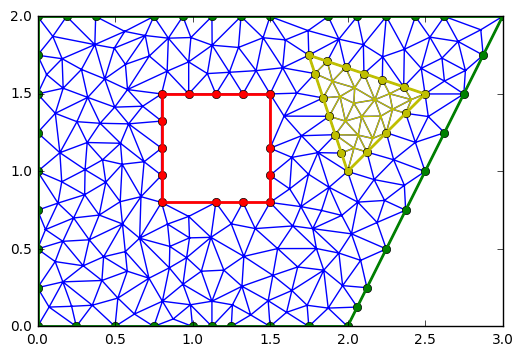

In [1]:
##box
%matplotlib inline
#%matplotlib wx

import numpy as np
from meshpy.triangle import MeshInfo, build, write_gnuplot_mesh
from meshpy.geometry import GeometryBuilder, Marker, make_box

points_bound = [(0.0,0.0), (2.0,0.0), (3.0, 2.0), (0.0, 2.0)]
facets_bound = [[0,1], [1,2], [2,3], [3,0]]

pts_hole_start = len(points_bound)
points_hole = [(0.8, 0.8), (0.8, 1.5), (1.5, 1.5), (1.5, 0.8)]
facets_hole = [[pts_hole_start+0, pts_hole_start+1], [pts_hole_start+1,pts_hole_start+2], 
               [pts_hole_start+2,pts_hole_start+3], [pts_hole_start+3,pts_hole_start+0]]

pts_reg1_start = pts_hole_start+len(points_hole)
points_reg1 = [(2.0, 1.0), (2.5, 1.5), (1.75, 1.75)]
facets_reg1 = [[pts_reg1_start, pts_reg1_start+1], [pts_reg1_start+1, pts_reg1_start+2], 
               [pts_reg1_start+2, pts_reg1_start+0]]

points = points_bound + points_hole + points_reg1
facets = facets_bound + facets_hole + facets_reg1

bound_marker = Marker.FIRST_USER_MARKER
hole_marker = Marker.FIRST_USER_MARKER + 1
reg1_marker = Marker.FIRST_USER_MARKER + 2

points_mk = [bound_marker]*len(points_bound) + [hole_marker]*len(points_hole) + [reg1_marker]*len(points_reg1)
facets_mk = [bound_marker]*len(facets_bound) + [hole_marker]*len(facets_hole) + [reg1_marker]*len(facets_reg1)


mesh_info = MeshInfo()
mesh_info.set_points(points, points_mk)
mesh_info.set_facets(facets, facets_mk)
mesh_info.set_holes([(1.25, 1.25)])

mesh_info.regions.resize(1)
mesh_info.regions[0] = (2.1,1.4,     reg1_marker, 0.009)

mesh = build(mesh_info, max_volume=0.02, attributes=True, volume_constraints=True)

import matplotlib.pyplot as plt

plt.triplot(np.array(mesh.points)[:, 0], np.array(mesh.points)[:, 1], np.array(mesh.elements))

print('elements:', len(mesh.elements))
print('points:', len(mesh.points))
print('facets:', len(mesh.facets))
print('faces:', len(mesh.faces))
#print('point_markers:', len(mesh.point_markers))
#print('facet_markers:', len(mesh.facet_markers))
point_markers = set(list(mesh.point_markers))
facet_markers = set(list(mesh.facet_markers))
print('point_markers:', point_markers)
print('facet_markers:', facet_markers)

for i in range(len(mesh.points)):
    if mesh.point_markers[i]==hole_marker:
        plt.plot(mesh.points[i][0], mesh.points[i][1], 'ro')
    elif mesh.point_markers[i]==bound_marker:
        plt.plot(mesh.points[i][0], mesh.points[i][1], 'go')
    elif mesh.point_markers[i]==reg1_marker:
        plt.plot(mesh.points[i][0], mesh.points[i][1], 'yo')
for i in range(len(mesh.facets)):
    if mesh.facet_markers[i]==hole_marker:
        p0, p1 = mesh.facets[i]
        plt.plot([mesh.points[p0][0], mesh.points[p1][0]], [mesh.points[p0][1], mesh.points[p1][1]], 'r', lw=2)
    elif mesh.facet_markers[i]==bound_marker:
        p0, p1 = mesh.facets[i]
        plt.plot([mesh.points[p0][0], mesh.points[p1][0]], [mesh.points[p0][1], mesh.points[p1][1]], 'g', lw=2)
    elif mesh.facet_markers[i]==reg1_marker:
        p0, p1 = mesh.facets[i]
        plt.plot([mesh.points[p0][0], mesh.points[p1][0]], [mesh.points[p0][1], mesh.points[p1][1]], 'y', lw=2)

reg1_elems = [mesh.elements[i] for i in range(len(mesh.element_attributes)) if mesh.element_attributes[i]==reg1_marker]  
plt.triplot(np.array(mesh.points)[:, 0], np.array(mesh.points)[:, 1], np.array(reg1_elems), color='y')

plt.show()


#write_gnuplot_mesh("other/test.2dplot", mesh)


Populating the interactive namespace from numpy and matplotlib


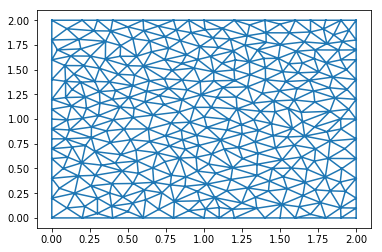

In [1]:
##box
%pylab inline
#%matplotlib wx

import numpy as np
from meshpy.triangle import MeshInfo, build, write_gnuplot_mesh
from meshpy.geometry import make_box
from meshpy.geometry import GeometryBuilder

box = make_box(a=(0.0, 0.0), b=(2.0, 2.0), subdivisions=(10, 10))

mesh_info = MeshInfo()
mesh_info.set_points(box[0])
mesh_info.set_facets(box[1])

mesh = build(mesh_info, max_volume=0.01)

import matplotlib.pyplot as plt

plt.triplot(np.array(mesh.points)[:, 0], np.array(mesh.points)[:, 1], np.array(mesh.elements))
plt.show()
    
#write_gnuplot_mesh("other/test.2dplot", mesh)

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['box']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


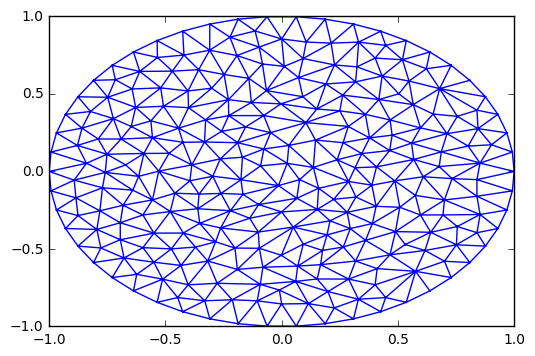

In [3]:
##circle
%pylab inline
#%matplotlib wx

import numpy as np
from meshpy.triangle import MeshInfo, build, write_gnuplot_mesh, refine
from meshpy.geometry import make_circle
from meshpy.geometry import GeometryBuilder

circle = make_circle(r=1.0, center=(0.0, 0.0), subdivisions=50)

mesh_info = MeshInfo()
mesh_info.set_points(circle[0])
mesh_info.set_facets(circle[1])

mesh = build(mesh_info, max_volume=0.01)


import matplotlib.pyplot as plt

plt.triplot(np.array(mesh.points)[:, 0], np.array(mesh.points)[:, 1], np.array(mesh.elements))
plt.show()
    
#write_gnuplot_mesh("other/test.2dplot", mesh)

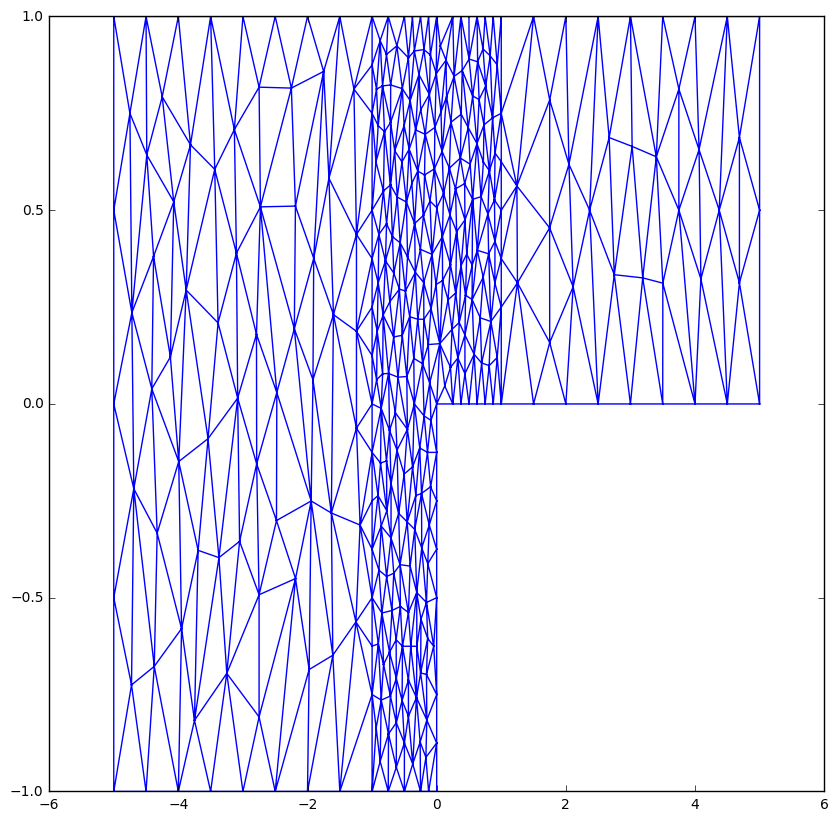

In [4]:
## example test_tri_pml
%matplotlib inline
#%matplotlib wx

import numpy as np
import meshpy.triangle as triangle
import math
import pickle

segments = 50

points = [(-5,-1), (-1,-1), (0,-1), (0,0), (1,0), (5,0), (5,1), (1,1), (-1,1), (-5,1)]

def round_trip_connect(seq):
    result = []
    for i in range(len(seq)):
        result.append((seq[i], seq[(i+1)%len(seq)]))
    return result

info = triangle.MeshInfo()
info.set_points(points)

info.set_facets(
        round_trip_connect([0,1,8,9])
        +round_trip_connect([1,2,3,4,7,8])
        +round_trip_connect([4,5,6,7])
        )
info.regions.resize(3)
info.regions[0] = (-2,0,     1,0.1)
info.regions[1] = (-0.5,0,   0,0.01)
info.regions[2] = (1.5,0.5,  1,0.1)

mesh = triangle.build(info, volume_constraints=True)#, max_volume=0.1)

import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 10)
plt.triplot(np.array(mesh.points)[:, 0], np.array(mesh.points)[:, 1], np.array(mesh.elements))
plt.show()

#triangle.write_gnuplot_mesh("other/triangles.dat", mesh)
#mesh.write_neu(open("other/tri_pml.neu", "w"))



Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['info']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


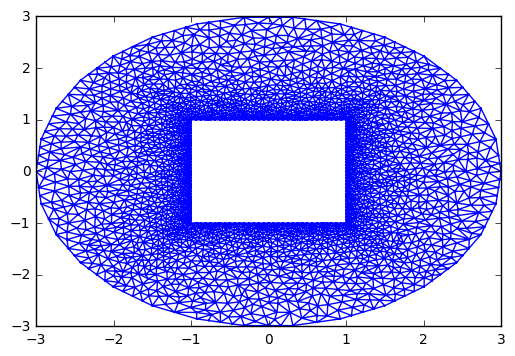

In [5]:
## circle with hole
## example test_triangle
%pylab inline
#%matplotlib wx

import meshpy.triangle as triangle
import numpy as np
import numpy.linalg as la


def round_trip_connect(start, end):
    return [(i, i+1) for i in range(start, end)] + [(end, start)]


points = [(1, 0), (1, 1), (-1, 1), (-1, -1), (1, -1), (1, 0)]
facets = round_trip_connect(0, len(points)-1)

circ_start = len(points)
points.extend(
        (3 * np.cos(angle), 3 * np.sin(angle))
        for angle in np.linspace(0, 2*np.pi, 30, endpoint=False))

facets.extend(round_trip_connect(circ_start, len(points)-1))

def needs_refinement(vertices, area):
    bary = np.sum(np.array(vertices), axis=0)/3
    max_area = 0.001 + (la.norm(bary, np.inf)-1)*0.01
    return bool(area > max_area)

info = triangle.MeshInfo()
info.set_points(points)
info.set_holes([(0, 0)])
info.set_facets(facets)

mesh = triangle.build(info, refinement_func=needs_refinement)

mesh_points = np.array(mesh.points)
mesh_tris = np.array(mesh.elements)

import matplotlib.pyplot as plt
plt.triplot(mesh_points[:, 0], mesh_points[:, 1], mesh_tris)
plt.show()


### 3D Mesh

In [1]:
##Box 

#%pylab inline
%matplotlib tk

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from meshpy.tet import MeshInfo, build
from mpl_toolkits.mplot3d import Axes3D

mesh_info = MeshInfo()
mesh_info.set_points([
    (0,0,0), (2,0,0), (2,2,0), (0,2,0),
    (0,0,3), (2,0,3), (2,2,3), (0,2,3),
    ])
mesh_info.set_facets([
    [0,1,2,3],
    [4,5,6,7],
    [0,4,5,1],
    [1,5,6,2],
    [2,6,7,3],
    [3,7,4,0],
    ])
mesh = build(mesh_info, max_volume=0.1)


mpl.rcParams['legend.fontsize'] = 10
fig = plt.figure()
ax = fig.gca(projection='3d')

for i in range(len(mesh.elements)):
    p_inds = mesh.elements[i]
    p_0, p_1, p_2, p_3 = [mesh.points[p_inds[j]] for j in range(4)]
    x = np.array([p_0[0], p_1[0], p_2[0], p_0[0], p_3[0], p_1[0], p_2[0], p_3[0]])
    y = np.array([p_0[1], p_1[1], p_2[1], p_0[1], p_3[1], p_1[1], p_2[1], p_3[1]])
    z = np.array([p_0[2], p_1[2], p_2[2], p_0[2], p_3[2], p_1[2], p_2[2], p_3[2]])
    ax.plot(x, y, z, 'b')
    
plt.show()
    
#mesh.write_vtk("other/test.vtk")

In [4]:
##Box in box example

#%pylab inline
#wx, tk, qt
%matplotlib wx

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

import numpy
from meshpy.tet import MeshInfo, build
from meshpy.geometry import GeometryBuilder, Marker, make_box

geob = GeometryBuilder()

box_marker = Marker.FIRST_USER_MARKER
extent_small = 0.5*numpy.ones(3, dtype=numpy.float64)
points, facets, _, _ = \
        make_box(-extent_small, extent_small)

geob.add_geometry(points, facets, facet_markers=box_marker)

points, facets, _, facet_markers = \
        make_box(numpy.array([-1, -1, -1]), numpy.array([1, 1, 1]))

geob.add_geometry(points, facets, facet_markers=facet_markers)

mesh_info = MeshInfo()
geob.set(mesh_info)
#mesh_info.set_holes([(0, 0, 0)])

# region attributes
mesh_info.regions.resize(1)
mesh_info.regions[0] = (
        # point in region
        [0, 0, 0] + [
            # region number
            1,
            # max volume in region
            0.001])

mesh = build(mesh_info, max_volume=0.3,
        volume_constraints=True, attributes=True)
print(("%d elements" % len(mesh.elements)))

mpl.rcParams['legend.fontsize'] = 10
fig = plt.figure()
ax = fig.gca(projection='3d')

for i in range(len(mesh.elements)):
    p_inds = mesh.elements[i]
    p_0, p_1, p_2, p_3 = [mesh.points[p_inds[j]] for j in range(4)]
    x = np.array([p_0[0], p_1[0], p_2[0], p_0[0], p_3[0], p_1[0], p_2[0], p_3[0]])
    y = np.array([p_0[1], p_1[1], p_2[1], p_0[1], p_3[1], p_1[1], p_2[1], p_3[1]])
    z = np.array([p_0[2], p_1[2], p_2[2], p_0[2], p_3[2], p_1[2], p_2[2], p_3[2]])
    ax.plot(x, y, z, 'b')
    
plt.show()

#mesh.write_vtk("other/box-in-box.vtk")


4959 elements
